# Introduction

Using Customer Behavior Data to Improve Customer Retention.

Data source: 

https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/


## Import some libraries for analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Getting familiar with the data set

In [2]:
dataframe = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 
# Upload dataset

In [3]:
dataframe.shape
# Number of rows & columns

(7043, 21)

In [4]:
dataframe.head() 
# Prints the head of the original data to see what it looks like

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataframe.dtypes
# check data types

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
"""
There is no reason for TotalCharges column to be an object.
Transform the data to its numeric values float64
"""
dataframe["TotalChargesNum"] = pd.to_numeric(dataframe["TotalCharges"],errors='coerce')
# Check for a new data type
dataframe["TotalChargesNum"].dtypes

dtype('float64')

In [7]:
# Check for missing values
dataframe.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
TotalChargesNum     11
dtype: int64

In [8]:
# Check to find the reason for NaN values in TotalChargesNum column

test_df = dataframe[dataframe['TotalChargesNum'].isnull()]
test_df[['tenure','TotalChargesNum', 'Contract','TotalCharges', 'Churn']]

,tenure,TotalChargesNum,Contract,TotalCharges,Churn
488,0,NaN,Two year,,No
753,0,NaN,Two year,,No
936,0,NaN,Two year,,No
1082,0,NaN,Two year,,No
1340,0,NaN,Two year,,No
3331,0,NaN,Two year,,No
3826,0,NaN,Two year,,No
4380,0,NaN,Two year,,No
5218,0,NaN,One year,,No
6670,0,NaN,Two year,,No


In [9]:
# Since all the NaN values comes from new contracts, they'll be replaced by "0"
dataframe['TotalChargesNum'].fillna(0, inplace=True)
# New check for any missing value
dataframe['TotalChargesNum'].isnull().sum()

0

In [10]:
print(dataframe.describe()) 
# Get statistical summary of the numerical variables and check for abnormalities

       SeniorCitizen       tenure  MonthlyCharges  TotalChargesNum
count    7043.000000  7043.000000     7043.000000      7043.000000
mean        0.162147    32.371149       64.761692      2279.734304
std         0.368612    24.559481       30.090047      2266.794470
min         0.000000     0.000000       18.250000         0.000000
25%         0.000000     9.000000       35.500000       398.550000
50%         0.000000    29.000000       70.350000      1394.550000
75%         0.000000    55.000000       89.850000      3786.600000
max         1.000000    72.000000      118.750000      8684.800000


## Understanding non numerical classifications

In [11]:
columnlist = list(dataframe.columns.values)

for column in range(0,len(columnlist)):
    u = pd.unique(dataframe[columnlist[column]])
    if len(u) < 10:
        print('Values in column "' + columnlist[column] + '": ' + np.array_str(u))


Values in column "gender": ['Female' 'Male']
Values in column "SeniorCitizen": [0 1]
Values in column "Partner": ['Yes' 'No']
Values in column "Dependents": ['No' 'Yes']
Values in column "PhoneService": ['No' 'Yes']
Values in column "MultipleLines": ['No phone service' 'No' 'Yes']
Values in column "InternetService": ['DSL' 'Fiber optic' 'No']
Values in column "OnlineSecurity": ['No' 'Yes' 'No internet service']
Values in column "OnlineBackup": ['Yes' 'No' 'No internet service']
Values in column "DeviceProtection": ['No' 'Yes' 'No internet service']
Values in column "TechSupport": ['No' 'Yes' 'No internet service']
Values in column "StreamingTV": ['No' 'Yes' 'No internet service']
Values in column "StreamingMovies": ['No' 'Yes' 'No internet service']
Values in column "Contract": ['Month-to-month' 'One year' 'Two year']
Values in column "PaperlessBilling": ['Yes' 'No']
Values in column "PaymentMethod": ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automati

In [12]:
print(columnlist)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TotalChargesNum']


In [14]:
#df1 = dataframe[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn', 'TotalChargesNum']]
dfc=dataframe.copy()
dfc["Male"] = dfc['gender'].map({'Female':0, 'Male':1})
dfc["Female"] = dfc['gender'].map({'Female':1, 'Male':0})
#dfc['InternetService'] = dfc['InternetService'].map({'No': "No internet" })
dfc["InternetInstalled"] = dfc['InternetService'].replace({'No':0,'DSL':1,'Fiber optic': 1 })
dfc["TelephoneInstalled"] = dfc['PhoneService'].replace({'No': 0, 'Yes': 1 })
dfc["BundleSize"] = dfc['TelephoneInstalled']+dfc["InternetInstalled"]
#dfc[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']]=dfc[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']].replace({'No': 0, 'Yes': 1 })
#dfc = dfc.replace({'No': 0, 'Yes': 1, 'No internet service': 0, 'No phone service':0 })
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
customerID            7043 non-null object
gender                7043 non-null object
SeniorCitizen         7043 non-null int64
Partner               7043 non-null object
Dependents            7043 non-null object
tenure                7043 non-null int64
PhoneService          7043 non-null object
MultipleLines         7043 non-null object
InternetService       7043 non-null object
OnlineSecurity        7043 non-null object
OnlineBackup          7043 non-null object
DeviceProtection      7043 non-null object
TechSupport           7043 non-null object
StreamingTV           7043 non-null object
StreamingMovies       7043 non-null object
Contract              7043 non-null object
PaperlessBilling      7043 non-null object
PaymentMethod         7043 non-null object
MonthlyCharges        7043 non-null float64
TotalCharges          7043 non-null object
Churn                 7043 non-nul

## Understanding who are the customers and the products they use

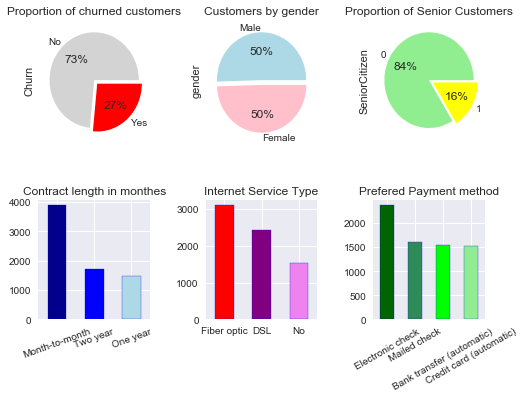

In [23]:
plt.figure(1).subplots_adjust(hspace=.5, wspace =.5)

plt.subplot(231)
dataframe['Churn'].value_counts().plot.pie(autopct  = "%1.0f%%", colors = ['lightgrey', 'red'], explode = (0, 0.1), title = "Proportion of churned customers") 

plt.subplot(232)
dataframe['gender'].value_counts().plot.pie(autopct  = "%1.0f%%", colors = ['lightblue', 'pink'], explode = (0, 0.1), title = "Customers by gender") 

plt.subplot(233)
dataframe['SeniorCitizen'].value_counts().plot.pie(autopct  = "%1.0f%%", colors = ['lightgreen', 'yellow'], explode = (0, 0.1), title = "Proportion of Senior Customers") 

plt.subplot(234)
dataframe["Contract"].value_counts().plot( kind='bar',  rot=20, color=['darkblue','blue','lightblue'], edgecolor='b', title = 'Contract length in monthes')  

plt.subplot(235)
dataframe['InternetService'].value_counts().plot(kind='bar', rot=0, color=['red', 'purple', 'violet'], edgecolor='b', title = 'Internet Service Type')

plt.subplot(236)
dataframe["PaymentMethod"].value_counts().plot(kind='bar', rot = 30, color=['darkgreen', 'seagreen', 'lime','lightgreen'], edgecolor='b', title = "Prefered Payment method")
#plt.set_xticklabels(dataframe.index, rotation=90)                                                      
plt.show()

In [16]:
dataframe["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

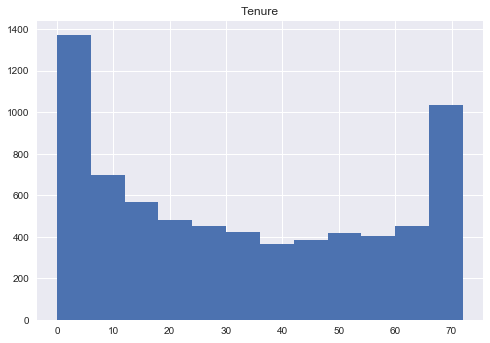

In [17]:
dataframe['tenure'].hist(bins=12)
plt.title("Tenure")
plt.show()

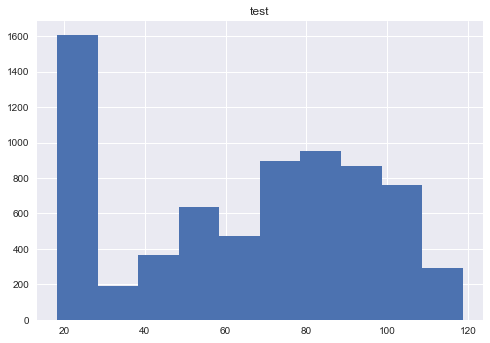

In [18]:
dataframe['MonthlyCharges'].hist()
plt.title("Monthly Charges")
plt.show()

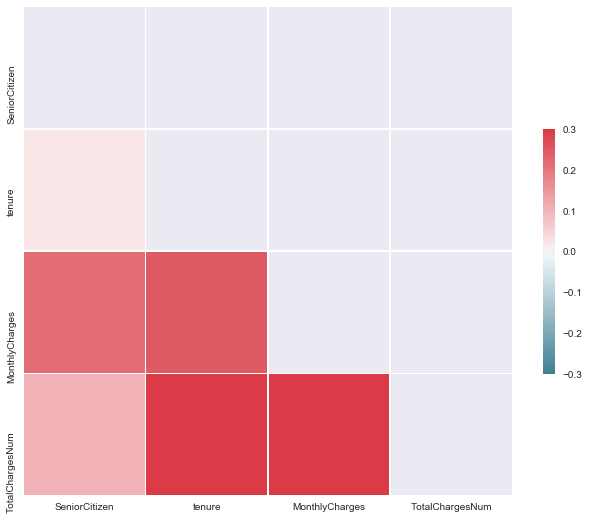

In [22]:
corr = dataframe.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()